In [1]:
using Distances
using DataStructures
using TextModel
using SimilaritySearch
using JSON
using PyCall
using PyPlot
using Interact
@pyimport sklearn.datasets as datagen
include("../src/fft.jl")


Use "abstract type Language end" instead.

Use "abstract type DanishLanguage<:Language end" instead.

Use "abstract type DutchLanguage<:Language end" instead.

Use "abstract type EnglishLanguage<:Language end" instead.

Use "abstract type FinnishLanguage<:Language end" instead.

Use "abstract type FrenchLanguage<:Language end" instead.

Use "abstract type GermanLanguage<:Language end" instead.

Use "abstract type HungarianLanguage<:Language end" instead.

Use "abstract type ItalianLanguage<:Language end" instead.

Use "abstract type NorwegianLanguage<:Language end" instead.

Use "abstract type PortugueseLanguage<:Language end" instead.

Use "abstract type RomanianLanguage<:Language end" instead.

Use "abstract type RussianLanguage<:Language end" instead.

Use "abstract type SpanishLanguage<:Language end" instead.

Use "abstract type SwedishLanguage<:Language end" instead.

Use "abstract type TurkishLanguage<:Language end" instead.

Use "abstract type AbstractDocument end" instead.

Us

fft (generic function with 2 methods)

In [276]:
function plot_clusters(data,labels,centers)
    colors=["ro","bo","go","mo","co","yo",
        "r^","b^","g^","m^","c^","y^",
        "r*","b*","g*","m*","c*","y*"]
    ci=1
    for l in Set(labels)
        ind=[i for (i,v) in enumerate(labels) if v==l]
        plot(data[ind,1],data[ind,2], colors[ci])
        ci=ci+1
    end
    plot(data[centers,1],data[centers,2], "k8", markersize=10)
end

plot_clusters (generic function with 1 method)

In [139]:
function lassign(data,centers)
    labels=[]
    for i in 1:length(data[:,1]) 
        x=data[i,:]
        dist=sort([(evaluate(Euclidean(), x,data[c,:]),c) for c in centers])
        push!(labels,dist[1][2])
    end
    return labels
end

lassign (generic function with 1 method)

In [140]:
function ffte(data,k::Int64)
    n=length(data[:,1])
    dst=KnnResult(n)
    c=rand(1:n)
    centers=[c]
    [push!(dst,i,Inf) for i in 1:n if i!=c] 
    while length(centers)<k
        dstn=KnnResult(n)
        c=last(centers)
        for nn in dst
            d=evaluate(Euclidean(), data[c,:],data[nn.objID,:])
            d = d<nn.dist ? d : nn.dist
            push!(dstn,nn.objID,d)
        end
        fn=pop!(dstn)
        dst=dstn
        push!(centers,fn.objID)
    end
    labels= lassign(data,centers)
    return centers, labels               
end

ffte (generic function with 1 method)

In [157]:
function fftp(data,k::Int64)
    n=length(data[:,1])
    c=rand(1:n)
    centers=[c]
    partitions=[c for i in 1:n]
    while length(centers)<k
        res=KnnResult(length(centers))
        for c in centers
            ind=[(i,l) for (i,l) in enumerate(partitions) if l==c]
            dist=sort([(evaluate(Euclidean(), data[c],data[i]),i) for (i,x) in ind])
            push!(res,last(dist)[2],last(dist)[1])
        end
        push!(centers,last(res).objID) 
        partitions = lassign(data,centers)
    end
    return centers,partitions              
end

fftp (generic function with 1 method)

In [294]:
r,y=datagen.make_blobs(n_samples=2000,centers=5);

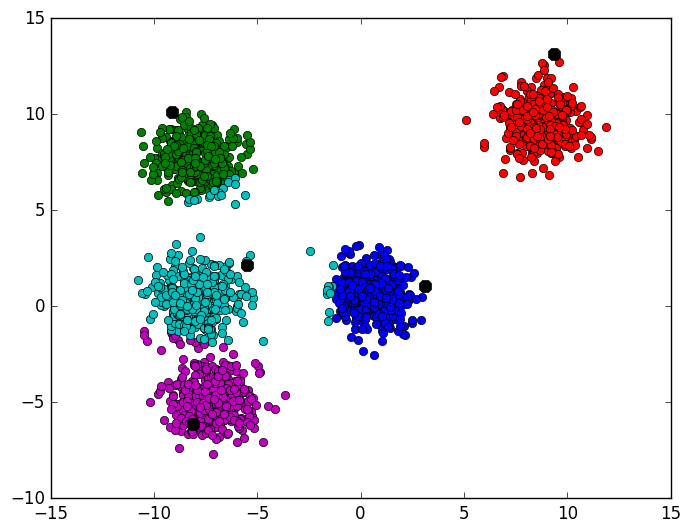

5-element Array{Int64,1}:
 1811
 1072
   80
 1203
 1567

In [364]:
centros,lb=ffte(r,5);
plot_clusters(r,lb,centros)
centros

In [306]:
r1,y1 = datagen.make_moons(n_samples=1000,noise=0.1)

([-0.245112 0.950835; 0.202414 0.087244; … ; -1.04577 0.056951; 0.871754 0.589667], [0, 1, 0, 0, 0, 0, 0, 1, 1, 0  …  0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

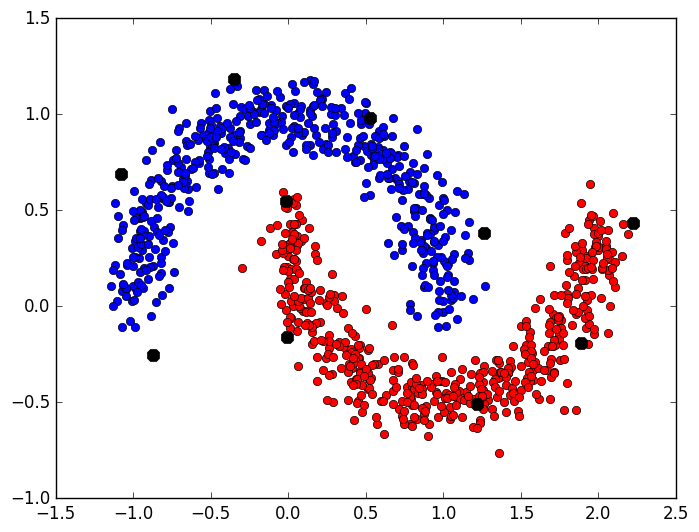

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140ecd748>

In [308]:
centros1,lb1=ffte(r1,10);
plot_clusters(r1,y1,centros1)

In [365]:
include("../src/fft.jl")

fft (generic function with 2 methods)

In [366]:
config=TextConfig(); config.nlist=[2]; config.qlist=[5];config.skiplist = []
tweets,vbows=list_of_items("../data/pionalisis.json","text",config);

In [369]:
c=fft(vbows[1:100],tweets[1:100],config,"text","3","maxmin")

>>>>>>>>>>>>>>> 100 1.5707963267948966 46
>>>>>>>>>>>>>>> 97 1.5707963267948966 45
>>>>>>>>>>>>>>> 96 1.5707963267948966 44
>>>>>>>>>>>>>>> 99 1.5707963267948966 25
>>>>>>>>>>>>>>> 98 1.5707963267948966 24
>>>>>>>>>>>>>>> 84 1.5707963267948966 23
>>>>>>>>>>>>>>> 95 1.5707963267948966 23
>>>>>>>>>>>>>>> 94 1.5707963267948966 22
>>>>>>>>>>>>>>> 91 1.5707963267948966 21


12-element Array{Any,1}:
  74
 100
  97
  96
  23
  99
  98
  84
   9
  95
  94
  91

In [370]:
c1=fft(vbows[1:100],tweets[1:100],config,"text","3","approx_maxmin")

INFO: XXX SimilaritySearch.BeamSearch. Starting parameter optimization; expected recall: 0.9, n: 7
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 1, expected recall: 0.9, n: 7
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: -0.10026041666666663, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":1}, perf: {"recall":-0.10026041666666663,"seconds":2.7084723114967346e-5,"distances":0.0} candidates: 2, n: 7
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 2, expected recall: 0.9, n: 7
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: -0.10026041666666663, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":1}, perf: {"recall":-0.10026041666666663,"seconds":2.7084723114967346e-5,"distances":0.0} candidates: 2, n: 7
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 3, expected recall: 0.9, n: 7
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: -0.10026041666666663, conf: {"candidates_size":1,"montecarlo_size":1,"beam_

INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.10390625000000002, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.10390625000000002,"seconds":6.602518260478973e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 3, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.10390625000000002, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.10390625000000002,"seconds":6.602518260478973e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 4, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.10390625000000002, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.10390625000000002,"seconds":6.602518260478973e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 5, expected recal

INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.025000000000000005, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.025000000000000005,"seconds":0.00013788975775241852,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 6, expected recall: 0.9, n: 31
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.025000000000000005, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.025000000000000005,"seconds":0.00013788975775241852,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 7, expected recall: 0.9, n: 31
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.025000000000000005, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.025000000000000005,"seconds":0.00013788975775241852,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 8, ex

>>>>>> Length: 1
Any[96]


INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.025000000000000005, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.025000000000000005,"seconds":0.00013788975775241852,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 17, expected recall: 0.9, n: 31
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.025000000000000005, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.025000000000000005,"seconds":0.00013788975775241852,"distances":0.0} candidates: 1, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 18, expected recall: 0.9, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Optimization done; fitness: 0.025000000000000005, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.025000000000000005,"seconds":0.00013788975775241852,"distances":0.0}, n: 31


LoadError: [91mBoundsError: attempt to access 0-element Array{Pair{Int64,Float64},1} at index [1][39m